In [568]:
#Træk data kun på Adj Close priser

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from scipy import stats
from alpha_vantage.timeseries import TimeSeries

df = pd.read_csv(r'C:\Users\Bruger\Desktop\Kandidat\Seminar - Corp Fin\localdata.csv', delimiter = ";", index_col = 'Unnamed: 0')
df = df.reindex(index = df.index[::-1]) #Ændrer rækkefølgen på rækkerne
print(df.head())

MMM      ABT  ABBV    ABMD  ACN    ATVI     ADBE  \
31-03-2000 00:00  27.0064   9.2906   NaN  20.250  NaN  0.9066  27.6407   
28-04-2000 00:00  26.4178  10.1705   NaN  18.565  NaN  0.4698  30.0248   
31-05-2000 00:00  26.5705  10.7658   NaN  19.000  NaN  0.4653  28.4354   
30-06-2000 00:00  25.4777  11.7897   NaN  15.375  NaN  0.4886  32.2909   
31-07-2000 00:00  27.6448  11.0013   NaN  19.875  NaN  0.6578  28.4408   

                     AMD  AAP      AES  ...  WYNN     XEL      XRX     XLNX  \
31-03-2000 00:00  29.500  NaN  27.9409  ...   NaN  8.2855  51.6505  59.2746   
28-04-2000 00:00  43.750  NaN  31.9112  ...   NaN  9.2491  52.6438  52.4316   
31-05-2000 00:00  40.815  NaN  30.9568  ...   NaN  9.4103  54.2927  55.2089   
30-06-2000 00:00  38.625  NaN  32.3795  ...   NaN  8.5621  41.5250  59.0957   
31-07-2000 00:00  36.000  NaN  37.9216  ...   NaN  9.5169  30.1381  53.7272   

                  XYL     YUM     ZBRA  ZBH     ZION  ZTS  
31-03-2000 00:00  NaN  3.9245   9.9259  Na

In [569]:
returns_df = df.copy() #Laver kopi af datasæt
#Formateret date til dato-format
returns_df = returns_df.apply(lambda x: x.shift(-1)/x - 1, axis = 0) #Beregner returns for alle værdier
nreturns_df = returns_df.shift(1, axis = 0) #Forskyder values med en række

In [570]:
#print(nreturns_df)

In [571]:
creturns_df = nreturns_df.copy()
creturns_df = creturns_df.apply(lambda x : x + x.shift(1) + x.shift(2) + x.shift(3) + x.shift(4) + x.shift(5), axis = 0) #akkumulerer de sidste 6 måneders afkast
creturns_df = creturns_df.shift(1, axis = 0) #Forskyder values med en række
print(creturns_df.iloc[0:15,:])

MMM       ABT  ABBV      ABMD  ACN      ATVI      ADBE  \
31-03-2000 00:00       NaN       NaN   NaN       NaN  NaN       NaN       NaN   
28-04-2000 00:00       NaN       NaN   NaN       NaN  NaN       NaN       NaN   
31-05-2000 00:00       NaN       NaN   NaN       NaN  NaN       NaN       NaN   
30-06-2000 00:00       NaN       NaN   NaN       NaN  NaN       NaN       NaN   
31-07-2000 00:00       NaN       NaN   NaN       NaN  NaN       NaN       NaN   
31-08-2000 00:00       NaN       NaN   NaN       NaN  NaN       NaN       NaN   
29-09-2000 00:00       NaN       NaN   NaN       NaN  NaN       NaN       NaN   
31-10-2000 00:00  0.046710  0.322759   NaN  0.689462  NaN  0.576326  0.379847   
30-11-2000 00:00  0.128859  0.340331   NaN  0.623986  NaN  0.978843  0.273117   
29-12-2000 00:00  0.162977  0.324406   NaN  0.404348  NaN  0.739336  0.159343   
31-01-2001 00:00  0.410553  0.109067   NaN  0.635463  NaN  1.148215 -0.058132   
28-02-2001 00:00  0.244165  0.106164   NaN  0.27309

In [572]:
dreturns_df = creturns_df.copy()
dreturns_df = dreturns_df.transpose() #Transponerer datasættet for at kunne se percentiler til fordeling
perc = [0.3, 0.70]
dreturns_df.describe(percentiles = perc)

,31-03-2000 00:00,28-04-2000 00:00,31-05-2000 00:00,30-06-2000 00:00,31-07-2000 00:00,31-08-2000 00:00,29-09-2000 00:00,31-10-2000 00:00,30-11-2000 00:00,29-12-2000 00:00,...,31-05-2019 00:00,28-06-2019 00:00,31-07-2019 00:00,30-08-2019 00:00,30-09-2019 00:00,31-10-2019 00:00,29-11-2019 00:00,31-12-2019 00:00,31-01-2020 00:00,21-02-2020 00:00
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,376.000000,377.000000,378.000000,...,497.000000,498.000000,498.000000,498.000000,498.000000,498.000000,501.000000,501.000000,502.000000,504.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.129447,0.149894,0.108105,...,0.117960,0.021199,0.197979,0.108329,0.040598,0.062773,0.039121,0.141329,0.091813,0.064118
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.355046,0.354822,0.341658,...,0.147569,0.160996,0.151693,0.147333,0.179743,0.145652,0.143189,0.137143,0.123675,0.132420
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.400614,-1.707232,-1.875295,...,-0.503702,-0.567876,-0.324725,-0.362056,-0.503271,-0.588663,-0.672935,-0.402649,-0.334614,-0.434771
30%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.016224,0.010782,-0.039163,...,0.057641,-0.040999,0.142191,0.043323,-0.042677,0.006235,-0.012148,0.079387,0.040607,-0.001145
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.136579,0.142811,0.116519,...,0.134049,0.039867,0.200928,0.122050,0.060126,0.083149,0.053398,0.138991,0.089289,0.065076
70%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.277772,0.287931,0.240920,...,0.182794,0.107436,0.270701,0.181353,0.149655,0.144108,0.117993,0.204464,0.147422,0.131387
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.707187,1.872311,1.906224,...,0.530839,0.529865,0.839585,0.555182,0.540045,0.448234,0.369864,0.581010,0.607600,0.475121


In [573]:
#Creating list of percentiles on different dates
percentiles = pd.DataFrame()

percentiles['lower bound'] = dreturns_df.quantile(0.3)
percentiles['upper bound'] = dreturns_df.quantile(0.70)

#print(percentiles)

In [574]:
#Tilføjer grænser til returns data for at kunne inddele
creturns_df['lower bound'] = percentiles.iloc[:, 0]
creturns_df['upper bound'] = percentiles.iloc[: , 1]

#print(creturns_df)

In [575]:
WinLos_df = creturns_df.copy()
WinLos_df = WinLos_df.apply(lambda x: (x >= creturns_df['upper bound'])) #| (x <= creturns_df['lower bound']))
WinLos2_df = creturns_df.copy()
WinLos2_df = WinLos2_df.apply(lambda x: (x <= creturns_df['lower bound']))
WinLos_df[WinLos_df == True] = 'Winner'
WinLos2_df[WinLos2_df == True] = 'Loser'
print(WinLos_df.tail())
print(WinLos2_df.tail())

MMM    ABT    ABBV   ABMD    ACN    ATVI    ADBE     AMD  \
31-10-2019 00:00  False  False   False  False  False  Winner   False   False   
29-11-2019 00:00  False  False   False  False  False  Winner   False  Winner   
31-12-2019 00:00  False  False   False  False  False  Winner   False  Winner   
31-01-2020 00:00  False  False  Winner  False  False  Winner   False  Winner   
21-02-2020 00:00  False  False  Winner  False  False  Winner  Winner  Winner   

                    AAP     AES  ...     XRX   XLNX    XYL    YUM    ZBRA  \
31-10-2019 00:00  False   False  ...   False  False  False  False   False   
29-11-2019 00:00  False   False  ...   False  False  False  False  Winner   
31-12-2019 00:00  False  Winner  ...  Winner  False  False  False  Winner   
31-01-2020 00:00  False  Winner  ...   False  False  False  False  Winner   
21-02-2020 00:00  False  Winner  ...  Winner  False  False  False  Winner   

                     ZBH    ZION     ZTS lower bound upper bound  
31-10-201

In [576]:
#Laver 6 måneders return
df2 = df.copy()
df2 = df2.pct_change(periods = 6)
#print(df2.head(10))

# WinnerPortfolio

In [577]:
#Laver DataFrame der inddeler i Winner / Loser

WinLos = WinLos_df.values
WinLos2 = WinLos2_df.values
n,m = WinLos_df.shape

merged = np.empty(shape=(n,m), dtype=object)

for i in range(n):
  for j in range(m):
      merged[i,j] = False
      if WinLos[i,j]:
        merged[i,j] = 'Winner'
      if WinLos2[i,j]:
        merged[i,j] = 'Looser'

WinnerLoser_df = pd.DataFrame(data = merged , index = WinLos_df.index , columns = WinLos_df.columns)
WinnerLoser_df = WinnerLoser_df.drop(WinnerLoser_df.columns[-1] , axis = 1)
WinnerLoser_df = WinnerLoser_df.drop(WinnerLoser_df.columns[-1] , axis = 1)

#Ændrer værdierne så long = 1 , short = -1 og kontrol = 0

WinnerLoser_df[WinnerLoser_df == 'Winner'] = 1
WinnerLoser_df[WinnerLoser_df == 'Looser'] = 0
WinnerLoser_df[WinnerLoser_df == False] = 0
print(WinnerLoser_df.head(18))

WinnerLoser_df = WinnerLoser_df.shift(6, axis = 0) #Forskyder values med en række (Bruges til nedenstående beregninger)

MMM ABT ABBV ABMD ACN ATVI ADBE AMD AAP AES  ... WYNN XEL  \
31-03-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
28-04-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
31-05-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
30-06-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
31-07-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
31-08-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
29-09-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
31-10-2000 00:00   0   1    0    1   0    1    1   0   0   1  ...    0   1   
30-11-2000 00:00   0   1    0    1   0    1    0   0   0   0  ...    0   0   
29-12-2000 00:00   0   1    0    1   0    1    0   0   0   0  ...    0   1   
31-01-2001 00:00   1   0    0    1   0    1    0   0   0   0  ...    0   1   
28-02-2001 00:00   0   0    0    0   0    1    0   0   0   0  ...    0   0   
30-

In [578]:
df2 = np.multiply(WinnerLoser_df , df2) # Ganger sammen nu hvor rækkerne er i overenstemmelse

print(df2.head(20))

MMM         ABT ABBV       ABMD  ACN      ATVI  \
31-03-2000 00:00        NaN         NaN  NaN        NaN  NaN       NaN   
28-04-2000 00:00        NaN         NaN  NaN        NaN  NaN       NaN   
31-05-2000 00:00        NaN         NaN  NaN        NaN  NaN       NaN   
30-06-2000 00:00        NaN         NaN  NaN        NaN  NaN       NaN   
31-07-2000 00:00        NaN         NaN  NaN        NaN  NaN       NaN   
31-08-2000 00:00        NaN         NaN  NaN        NaN  NaN       NaN   
29-09-2000 00:00          0           0  NaN          0  NaN         0   
31-10-2000 00:00          0           0  NaN          0  NaN         0   
30-11-2000 00:00          0           0  NaN          0  NaN         0   
29-12-2000 00:00          0           0  NaN          0  NaN         0   
31-01-2001 00:00          0           0  NaN          0  NaN         0   
28-02-2001 00:00          0           0  NaN         -0  NaN         0   
30-03-2001 00:00          0          -0  NaN         -0  NaN  

In [579]:
#Finder månedligt return med lige vægt i alle aktier
portfreturns_df = df2.sum(axis = 1) / WinnerLoser_df.astype(bool).sum(axis = 1)

print(portfreturns_df.head(25))

31-03-2000 00:00    0.000000
28-04-2000 00:00    0.000000
31-05-2000 00:00    0.000000
30-06-2000 00:00    0.000000
31-07-2000 00:00    0.000000
31-08-2000 00:00    0.000000
29-09-2000 00:00         NaN
31-10-2000 00:00         NaN
30-11-2000 00:00         NaN
29-12-2000 00:00         NaN
31-01-2001 00:00         NaN
28-02-2001 00:00         NaN
30-03-2001 00:00         NaN
30-04-2001 00:00    0.039895
31-05-2001 00:00    0.121339
29-06-2001 00:00    0.019868
31-07-2001 00:00    0.079032
31-08-2001 00:00    0.053265
28-09-2001 00:00    0.038794
31-10-2001 00:00    0.005552
30-11-2001 00:00    0.003891
31-12-2001 00:00    0.071023
31-01-2002 00:00    0.096409
28-02-2002 00:00    0.124449
28-03-2002 00:00    0.338712
dtype: float64


In [580]:
#Tilføjer investering og looper så løbende return findes

investment_W = portfreturns_df
investment_W = pd.DataFrame(data = investment_W , index = WinLos_df.index)
investment_W = investment_W.iloc[13:]
investment_W['investment'] = 100000
investment_W.iloc[0 , 1] = investment_W.iloc[0 , 1] + (investment_W.iloc[0 , 1] * investment_W.iloc[0 , 0])
investment_W = investment_W.iloc[::6 , :]

#Beregner hver måneds return ift investeringen

for i in range(1, len(investment_W)):
    investment_W.iloc[i , 1] = investment_W.iloc[i-1 , 1] + (investment_W.iloc[i-1 , 1] * investment_W.iloc[i , 0])



print(investment_W.head(38))
display(investment_W.iloc[-1] / 100000 * 100)
investment_W.iloc[: , 0].std()

0    investment
30-04-2001 00:00  0.039895  1.039895e+05
31-10-2001 00:00  0.005552  1.045668e+05
30-04-2002 00:00  0.136639  1.188547e+05
31-10-2002 00:00 -0.237472  9.063002e+04
30-04-2003 00:00  0.052642  9.540100e+04
31-10-2003 00:00  0.444131  1.377715e+05
30-04-2004 00:00  0.054954  1.453425e+05
29-10-2004 00:00  0.133464  1.647405e+05
29-04-2005 00:00  0.086828  1.790445e+05
31-10-2005 00:00  0.192149  2.134478e+05
28-04-2006 00:00  0.216425  2.596432e+05
31-10-2006 00:00  0.048877  2.723339e+05
30-04-2007 00:00  0.121154  3.053283e+05
31-10-2007 00:00  0.139402  3.478917e+05
30-04-2008 00:00 -0.054784  3.288329e+05
31-10-2008 00:00 -0.261380  2.428826e+05
30-04-2009 00:00 -0.087498  2.216308e+05
30-10-2009 00:00  0.141259  2.529382e+05
30-04-2010 00:00  0.373324  3.473662e+05
29-10-2010 00:00  0.069966  3.716699e+05
29-04-2011 00:00  0.213560  4.510436e+05
31-10-2011 00:00 -0.096365  4.075787e+05
30-04-2012 00:00  0.162509  4.738140e+05
31-10-2012 00:00  0.017999  4.823420e+05


0                0.000074
investment    1820.495105
Name: 31-10-2019 00:00, dtype: float64

0.132617979246794

In [581]:
#Tilføjer investering og looper så løbende return findes

investment_W1 = portfreturns_df
investment_W1 = pd.DataFrame(data = investment_W1 , index = WinLos_df.index)
investment_W1 = investment_W1.iloc[14:]
investment_W1['investment'] = 100000
investment_W1.iloc[0 , 1] = investment_W1.iloc[0 , 1] + (investment_W1.iloc[0 , 1] * investment_W1.iloc[0 , 0])
investment_W1 = investment_W1.iloc[::6 , :]

#Beregner hver måneds return ift investeringen

for i in range(1, len(investment_W1)):
    investment_W1.iloc[i , 1] = investment_W1.iloc[i-1 , 1] + (investment_W1.iloc[i-1 , 1] * investment_W1.iloc[i , 0])



#print(investment_W1.head())
#display(investment_W1.iloc[-1] / 100000 * 100)
#investment_W1.iloc[: , 0].std()

In [582]:
#Tilføjer investering og looper så løbende return findes

investment_W2 = portfreturns_df
investment_W2 = pd.DataFrame(data = investment_W2 , index = WinLos_df.index)
investment_W2 = investment_W2.iloc[15:]
investment_W2['investment'] = 100000
investment_W2.iloc[0 , 1] = investment_W2.iloc[0 , 1] + (investment_W2.iloc[0 , 1] * investment_W2.iloc[0 , 0])
investment_W2 = investment_W2.iloc[::6 , :]

#Beregner hver måneds return ift investeringen

for i in range(1, len(investment_W2)):
    investment_W2.iloc[i , 1] = investment_W2.iloc[i-1 , 1] + (investment_W2.iloc[i-1 , 1] * investment_W2.iloc[i , 0])



#print(investment_W2.head())
display(investment_W2.iloc[-1] / 100000 * 100)
investment_W2.iloc[: , 0].std()

0                0.000076
investment    1538.683947
Name: 31-12-2019 00:00, dtype: float64

0.132162081461263

In [583]:
#Tilføjer investering og looper så løbende return findes

investment_W3 = portfreturns_df
investment_W3 = pd.DataFrame(data = investment_W3 , index = WinLos_df.index)
investment_W3 = investment_W3.iloc[16:]
investment_W3['investment'] = 100000
investment_W3.iloc[0 , 1] = investment_W3.iloc[0 , 1] + (investment_W3.iloc[0 , 1] * investment_W3.iloc[0 , 0])
investment_W3 = investment_W3.iloc[::6 , :]

#Beregner hver måneds return ift investeringen

for i in range(1, len(investment_W3)):
    investment_W3.iloc[i , 1] = investment_W3.iloc[i-1 , 1] + (investment_W3.iloc[i-1 , 1] * investment_W3.iloc[i , 0])



#print(investment_W3.head())
display(investment_W3.iloc[-1] / 100000 * 100)
investment_W3.iloc[: , 0].std()

0                0.000069
investment    1849.504052
Name: 31-01-2020 00:00, dtype: float64

0.1197135083612901

In [584]:
#Tilføjer investering og looper så løbende return findes

investment_W4 = portfreturns_df
investment_W4 = pd.DataFrame(data = investment_W4 , index = WinLos_df.index)
investment_W4 = investment_W4.iloc[17:]
investment_W4['investment'] = 100000
investment_W4.iloc[0 , 1] = investment_W4.iloc[0 , 1] + (investment_W4.iloc[0 , 1] * investment_W4.iloc[0 , 0])
investment_W4 = investment_W4.iloc[::6 , :]

#Beregner hver måneds return ift investeringen

for i in range(1, len(investment_W4)):
    investment_W4.iloc[i , 1] = investment_W4.iloc[i-1 , 1] + (investment_W4.iloc[i-1 , 1] * investment_W4.iloc[i , 0])



#print(investment_W4.head())
display(investment_W4.iloc[-1] / 100000 * 100)
investment_W4.iloc[: , 0].std()

0                0.000126
investment    1795.388844
Name: 21-02-2020 00:00, dtype: float64

0.14086035105809086

In [585]:
#Tilføjer investering og looper så løbende return findes

investment_W5 = portfreturns_df
investment_W5 = pd.DataFrame(data = investment_W5 , index = WinLos_df.index)
investment_W5 = investment_W5.iloc[18:]
investment_W5['investment'] = 100000
investment_W5.iloc[0 , 1] = investment_W5.iloc[0 , 1] + (investment_W5.iloc[0 , 1] * investment_W5.iloc[0 , 0])
investment_W5 = investment_W5.iloc[::6 , :]

#Beregner hver måneds return ift investeringen

for i in range(1, len(investment_W5)):
    investment_W5.iloc[i , 1] = investment_W5.iloc[i-1 , 1] + (investment_W5.iloc[i-1 , 1] * investment_W5.iloc[i , 0])



#print(investment_W5.head())
display(investment_W5.iloc[-1] / 100000 * 100)
display(sp500.iloc[-1] / 100000 * 100)
investment_W5.iloc[: , 0].std()

0                0.000072
investment    1586.210420
Name: 30-09-2019 00:00, dtype: float64

Adj Close      0.000020
inv          261.784163
Name: 31-10-2019 00:00, dtype: float64

0.1441384472732648

# Henter SP500 ADJ Close priser

In [586]:
sp500 = pd.read_excel('GSPC.xlsx' , index_col = 0)
sp500 = sp500.pct_change(periods = 1) 
sp500 = sp500.iloc[13:]
#sp500.iloc[0] = 1
sp500['inv'] = 100000
sp500 = sp500.iloc[: , [0 , -1]]

sp500.iloc[0 , 1] = 100000 + (sp500.iloc[0 , 0] * 100000)

for i in range(1, len(sp500)):
    sp500.iloc[i , 1] = sp500.iloc[i-1 , 1] + (sp500.iloc[i-1 , 1] * sp500.iloc[i , 0])

sp500 = sp500.iloc[::6 , :] #Gør at rækkerne stemmer overens mellem de to figurer

sp500 = sp500.set_index(investment_W.index)

print(sp500.head(12))
print(sp500['inv'].std())
print(sp500.iloc[: , 0].std())

Adj Close            inv
30-04-2001 00:00   0.076814  107681.436176
31-10-2001 00:00   0.018099   91334.367739
30-04-2002 00:00  -0.061418   92811.535066
31-10-2002 00:00   0.086449   76336.907913
30-04-2003 00:00   0.081044   79022.348622
31-10-2003 00:00   0.054961   90552.687670
30-04-2004 00:00  -0.016791   95429.756275
29-10-2004 00:00   0.014014   97403.324387
29-04-2005 00:00  -0.020109   99700.087033
31-10-2005 00:00  -0.017741  104022.998265
28-04-2006 00:00   0.012156  112951.490929
31-10-2006 00:00   0.031508  118754.146945
52696.92770084855
0.05028504824620205


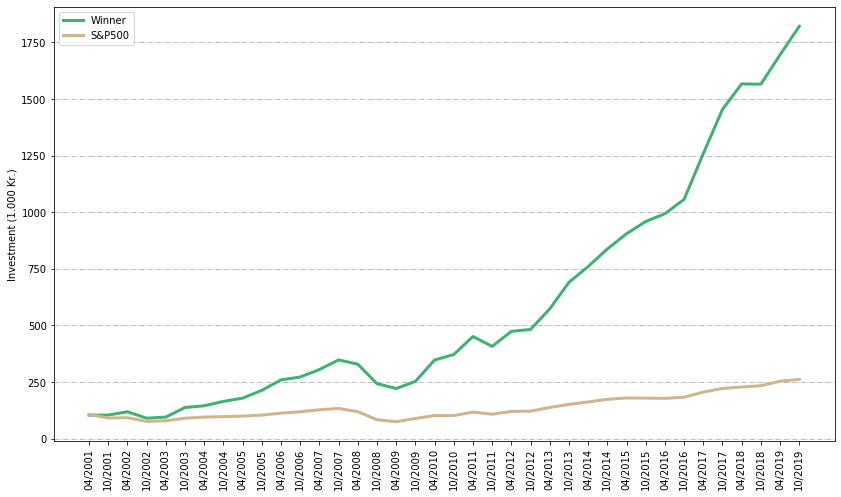

In [587]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

investment_W['Date'] = investment_W.index

investment_W['Date'] = pd.to_datetime(investment_W.Date)

investment_W['Date'] = investment_W['Date'].dt.strftime('%m/%Y')

plt.plot(investment_W['Date'] , investment_W['investment'] / 1000 , label = 'Winner' , color = '#3CB371' , linewidth = 3)
#plt.plot(investment_W['Date'] , investment_W1['investment'] / 1000 , label = 'Winner1' , color = 'r' , linewidth = 3)
#plt.plot(investment_W['Date'] , investment_W2['investment'] / 1000 , label = 'Winner2' , color = 'b' , linewidth = 3)
#plt.plot(investment_W['Date'] , investment_W3['investment'] / 1000 , label = 'Winner3' , color = 'y' , linewidth = 3)
#plt.plot(investment_W['Date'] , investment_W4['investment'] / 1000 , label = 'Winner4' , color = 'm' , linewidth = 3)
plt.plot(investment_W['Date'] , sp500['inv'] / 1000 , label = 'S&P500' , color = '#D2B48C' , linewidth = 3)

plt.legend(loc = 'upper left')
plt.ylabel('Investment (1.000 Kr.)')
#plt.title('Return by using momentum')
plt.xticks(rotation = 90)
plt.grid(True , axis = 'y' , linestyle = '-.')
plt.savefig('Winner.png')
plt.show()

# LoserPortfolio

In [588]:
#Laver 6 måneders return
df2 = df.copy()
df2 = df2.pct_change(periods = 6)
#print(df2.head(10))

In [589]:
#Laver DataFrame der inddeler i Winner / Loser

WinLos = WinLos_df.values
WinLos2 = WinLos2_df.values
n,m = WinLos_df.shape

merged = np.empty(shape=(n,m), dtype=object)

for i in range(n):
  for j in range(m):
      merged[i,j] = False
      if WinLos[i,j]:
        merged[i,j] = 'Winner'
      if WinLos2[i,j]:
        merged[i,j] = 'Looser'

WinnerLoser_df = pd.DataFrame(data = merged , index = WinLos_df.index , columns = WinLos_df.columns)
WinnerLoser_df = WinnerLoser_df.drop(WinnerLoser_df.columns[-1] , axis = 1)
WinnerLoser_df = WinnerLoser_df.drop(WinnerLoser_df.columns[-1] , axis = 1)

#Ændrer værdierne så long = 1 , short = -1 og kontrol = 0

WinnerLoser_df[WinnerLoser_df == 'Winner'] = 0
WinnerLoser_df[WinnerLoser_df == 'Looser'] = -1
WinnerLoser_df[WinnerLoser_df == False] = 0
print(WinnerLoser_df.head(18))

WinnerLoser_df = WinnerLoser_df.shift(6, axis = 0) #Forskyder values med en række (Bruges til nedenstående beregninger)

MMM ABT ABBV ABMD ACN ATVI ADBE AMD AAP AES  ... WYNN XEL  \
31-03-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
28-04-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
31-05-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
30-06-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
31-07-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
31-08-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
29-09-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
31-10-2000 00:00   0   0    0    0   0    0    0  -1   0   0  ...    0   0   
30-11-2000 00:00   0   0    0    0   0    0    0  -1   0   0  ...    0   0   
29-12-2000 00:00   0   0    0    0   0    0    0  -1   0   0  ...    0   0   
31-01-2001 00:00   0   0    0    0   0    0   -1  -1   0   0  ...    0   0   
28-02-2001 00:00   0   0    0    0   0    0   -1  -1   0   0  ...    0   0   
30-

In [590]:
df2 = np.multiply(WinnerLoser_df , df2) # Ganger sammen nu hvor rækkerne er i overenstemmelse

#print(df2.head(20))

In [591]:
#Finder månedligt return med lige vægt i alle aktier
portfreturns_df = df2.sum(axis = 1) / WinnerLoser_df.astype(bool).sum(axis = 1)

#print(portfreturns_df.head(25))

In [592]:
#Tilføjer investering og looper så løbende return findes

investment_L = portfreturns_df
investment_L = pd.DataFrame(data = investment_L , index = WinLos_df.index)
investment_L = investment_L.iloc[13:]
investment_L['investment'] = 100000
investment_L.iloc[0 , 1] = investment_L.iloc[0 , 1] + (investment_L.iloc[0 , 1] * investment_L.iloc[0 , 0])
investment_L = investment_L.iloc[::6 , :]

#Beregner hver måneds return ift investeringen

for i in range(1, len(investment_L)):
    investment_L.iloc[i , 1] = investment_L.iloc[i-1 , 1] + (investment_L.iloc[i-1 , 1] * investment_L.iloc[i , 0])



print(investment_L.iloc[0:38])

0    investment
30-04-2001 00:00 -0.128678  87132.182285
31-10-2001 00:00  0.133134  98732.461704
30-04-2002 00:00 -0.203278  78662.332902
31-10-2002 00:00  0.187544  93415.018092
30-04-2003 00:00 -0.386978  57265.423012
31-10-2003 00:00 -0.312091  39393.391341
30-04-2004 00:00 -0.142139  33794.035250
29-10-2004 00:00 -0.058677  31811.111612
29-04-2005 00:00 -0.075760  29401.115199
31-10-2005 00:00 -0.112690  26087.903154
28-04-2006 00:00 -0.144327  22322.719582
31-10-2006 00:00 -0.070523  20748.448546
30-04-2007 00:00 -0.139542  17853.177798
31-10-2007 00:00 -0.038844  17159.682819
30-04-2008 00:00  0.070084  18362.307833
31-10-2008 00:00  0.311103  24074.881837
30-04-2009 00:00 -0.021261  23563.036809
30-10-2009 00:00 -0.354187  15217.315313
30-04-2010 00:00 -0.172926  12585.838735
29-10-2010 00:00 -0.011487  12441.262342
29-04-2011 00:00 -0.204609   9895.668188
31-10-2011 00:00  0.046158  10352.432242
30-04-2012 00:00 -0.178552   8503.987995
31-10-2012 00:00 -0.040838   8156.699862


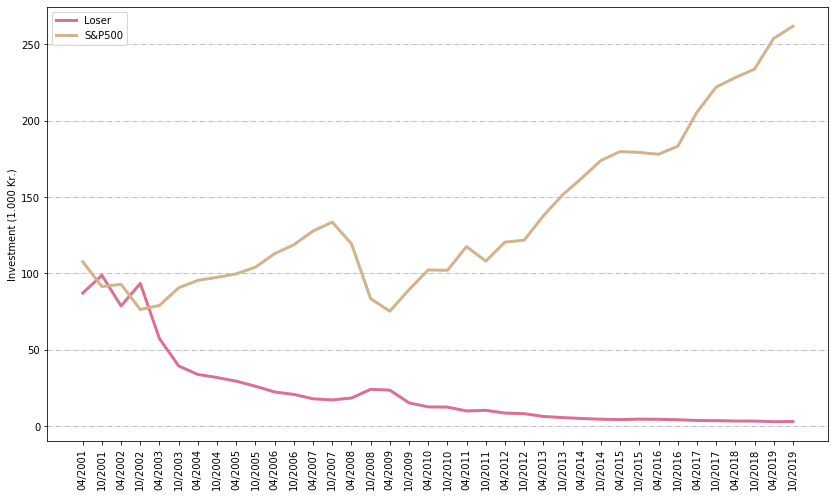

In [593]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

investment_L['Date'] = investment_L.index

investment_L['Date'] = pd.to_datetime(investment_L.Date)

investment_L['Date'] = investment_L['Date'].dt.strftime('%m/%Y')

plt.plot(investment_L['Date'] , investment_L['investment'] / 1000 , label = 'Loser' , color = '#DB7093' , linewidth = 3)
plt.plot(investment_L['Date'] , sp500['inv'] / 1000 , label = 'S&P500' , color = '#D2B48C' , linewidth = 3)

plt.legend(loc = 'upper left')

plt.ylabel('Investment (1.000 Kr.)')
plt.xticks(rotation = 90)
plt.grid(True , axis = 'y' , linestyle = '-.')
plt.savefig('Loser.png')
plt.show()

# WinnerLoser og df
portf_df = pd.DataFrame(index = WinLos_df.index , columns = WinnerLoser_df.columns)


for i in WinnerLoser_df.columns:
    for j in range(230, len(WinnerLoser_df)):
        portf_df[i][j] = WinnerLoser_df[i][j] * (df[i][j] / df[i][j] - 1)

print(portf_df.tail(10))

In [594]:
#Laver 6 måneders return
df2 = df.copy()
df2 = df2.pct_change(periods = 6)
#print(df2.head(10))

In [595]:
#Laver DataFrame der inddeler i Winner / Loser

WinLos = WinLos_df.values
WinLos2 = WinLos2_df.values
n,m = WinLos_df.shape

merged = np.empty(shape=(n,m), dtype=object)

for i in range(n):
  for j in range(m):
      merged[i,j] = False
      if WinLos[i,j]:
        merged[i,j] = 'Winner'
      if WinLos2[i,j]:
        merged[i,j] = 'Looser'

WinnerLoser_df = pd.DataFrame(data = merged , index = WinLos_df.index , columns = WinLos_df.columns)
WinnerLoser_df = WinnerLoser_df.drop(WinnerLoser_df.columns[-1] , axis = 1)
WinnerLoser_df = WinnerLoser_df.drop(WinnerLoser_df.columns[-1] , axis = 1)

#Ændrer værdierne så long = 1 , short = -1 og kontrol = 0

WinnerLoser_df[WinnerLoser_df == 'Winner'] = 1
WinnerLoser_df[WinnerLoser_df == 'Looser'] = -1
WinnerLoser_df[WinnerLoser_df == False] = 0
print(WinnerLoser_df.head(18))

WinnerLoser_df = WinnerLoser_df.shift(6, axis = 0) #Forskyder values med en række (Bruges til nedenstående beregninger)

MMM ABT ABBV ABMD ACN ATVI ADBE AMD AAP AES  ... WYNN XEL  \
31-03-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
28-04-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
31-05-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
30-06-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
31-07-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
31-08-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
29-09-2000 00:00   0   0    0    0   0    0    0   0   0   0  ...    0   0   
31-10-2000 00:00   0   1    0    1   0    1    1  -1   0   1  ...    0   1   
30-11-2000 00:00   0   1    0    1   0    1    0  -1   0   0  ...    0   0   
29-12-2000 00:00   0   1    0    1   0    1    0  -1   0   0  ...    0   1   
31-01-2001 00:00   1   0    0    1   0    1   -1  -1   0   0  ...    0   1   
28-02-2001 00:00   0   0    0    0   0    1   -1  -1   0   0  ...    0   0   
30-

In [596]:
df2 = np.multiply(WinnerLoser_df , df2) # Ganger sammen nu hvor rækkerne er i overenstemmelse

#print(df2.head(20))

In [597]:
#Finder månedligt return med lige vægt i alle aktier
portfreturns_df = df2.sum(axis = 1) / WinnerLoser_df.astype(bool).sum(axis = 1)

#print(portfreturns_df.head(25))

In [598]:
#Tilføjer investering og looper så løbende return findes

investment_WML = portfreturns_df
investment_WML = pd.DataFrame(data = investment_WML , index = WinLos_df.index)
investment_WML = investment_WML.iloc[13:]
investment_WML['investment'] = 100000
investment_WML.iloc[0 , 1] = investment_WML.iloc[0 , 1] + (investment_WML.iloc[0 , 1] * investment_WML.iloc[0 , 0])
investment_WML = investment_WML.iloc[::6 , :]

#Beregner hver måneds return ift investeringen

for i in range(1, len(investment_WML)):
    investment_WML.iloc[i , 1] = investment_WML.iloc[i-1 , 1] + (investment_WML.iloc[i-1 , 1] * investment_WML.iloc[i , 0])



print(investment_WML.iloc[0:38])

0     investment
30-04-2001 00:00 -0.044392   95560.845976
31-10-2001 00:00  0.069343  102187.322404
30-04-2002 00:00 -0.033319   98782.492989
31-10-2002 00:00 -0.024964   96316.491049
30-04-2003 00:00 -0.167168   80215.455144
31-10-2003 00:00  0.066020   85511.256265
30-04-2004 00:00 -0.043593   81783.568451
29-10-2004 00:00  0.037393   84841.742300
29-04-2005 00:00  0.005534   85311.259909
31-10-2005 00:00  0.039730   88700.643161
28-04-2006 00:00  0.036049   91898.205349
31-10-2006 00:00 -0.010823   90903.600742
30-04-2007 00:00 -0.009194   90067.867924
31-10-2007 00:00  0.050279   94596.379718
30-04-2008 00:00  0.007650   95320.076296
31-10-2008 00:00  0.024862   97689.892145
30-04-2009 00:00 -0.054379   92377.567987
30-10-2009 00:00 -0.106464   82542.702008
30-04-2010 00:00  0.100199   90813.391378
29-10-2010 00:00  0.029239   93468.708137
29-04-2011 00:00  0.004475   93887.009083
31-10-2011 00:00 -0.025104   91530.111347
30-04-2012 00:00 -0.008021   90795.927377
31-10-2012 00:00 

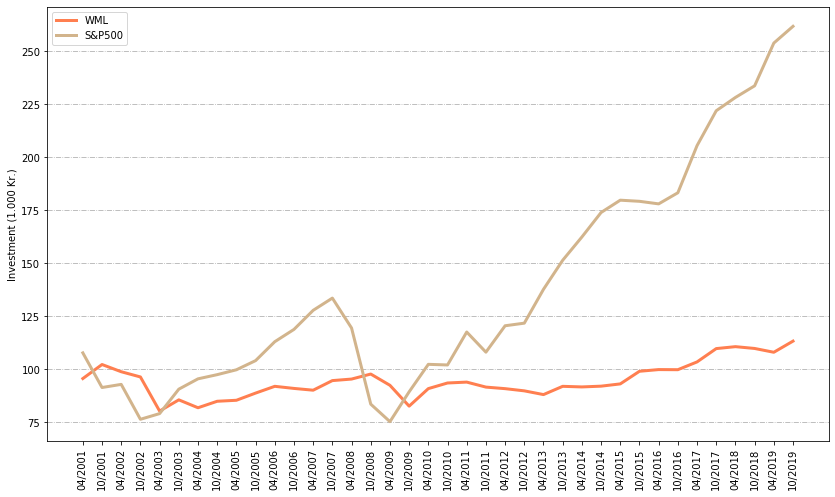

In [599]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

investment_WML['Date'] = investment_WML.index

investment_WML['Date'] = pd.to_datetime(investment_WML.Date)

investment_WML['Date'] = investment_WML['Date'].dt.strftime('%m/%Y')

plt.plot(investment_WML['Date'] , investment_WML['investment'] / 1000 , label = 'WML' , color = '#FF7F50' , linewidth = 3)
plt.plot(investment_WML['Date'] , sp500['inv'] / 1000 , label = 'S&P500' , color = '#D2B48C' , linewidth = 3)

plt.legend(loc = 'upper left')

plt.ylabel('Investment (1.000 Kr.)')
plt.xticks(rotation = 90)
plt.grid(True , axis = 'y' , linestyle = '-.')
plt.savefig('WML.png')
plt.show()

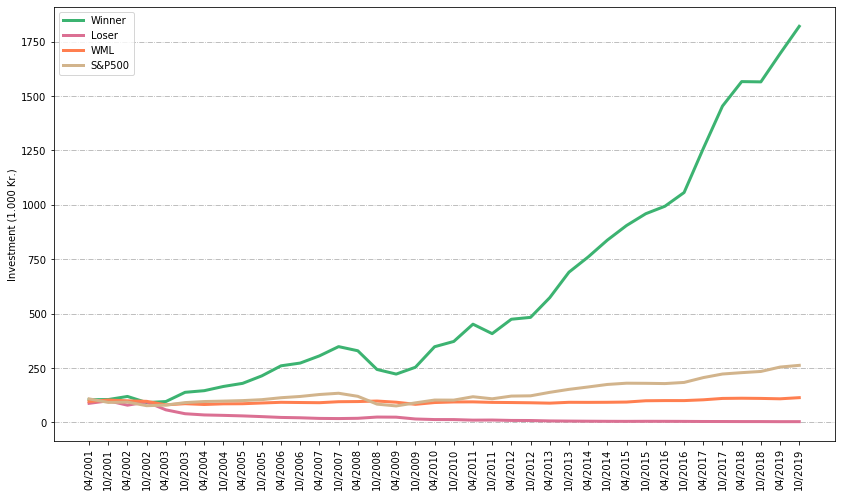

In [600]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

investment_W['Date'] = investment_W.index

investment_W['Date'] = pd.to_datetime(investment_W.Date)

investment_W['Date'] = investment_W['Date'].dt.strftime('%m/%Y')

plt.plot(investment_W['Date'] , investment_W['investment'] / 1000 , label = 'Winner' , color = '#3CB371' , linewidth = 3)
plt.plot(investment_L['Date'] , investment_L['investment'] / 1000 , label = 'Loser' , color = '#DB7093' , linewidth = 3)
plt.plot(investment_WML['Date'] , investment_WML['investment'] / 1000 , label = 'WML' , color = '#FF7F50' , linewidth = 3)
plt.plot(investment_WML['Date'] , sp500['inv'] / 1000 , label = 'S&P500' , color = '#D2B48C' , linewidth = 3)

plt.legend(loc = 'upper left')

plt.ylabel('Investment (1.000 Kr.)')
plt.xticks(rotation = 90)
plt.grid(True , axis = 'y' , linestyle = '-.')
plt.savefig('Samlet.png')
plt.show()

In [601]:
table = pd.DataFrame(index = investment_W.index)

table['WinnerD'] = investment_W['investment'] - sp500['inv']
table['LoserD'] = investment_L['investment'] - sp500['inv']
table['WMLD'] = investment_WML['investment'] - sp500['inv']

print(table.head(10))

WinnerD        LoserD          WMLD
30-04-2001 00:00   -3691.926509 -20549.253891 -12120.590200
31-10-2001 00:00   13232.465175   7398.093965  10852.954665
30-04-2002 00:00   26043.198474 -14149.202164   5970.957922
31-10-2002 00:00   14293.109145  17078.110179  19979.583136
30-04-2003 00:00   16378.649491 -21756.925610   1193.106522
31-10-2003 00:00   47218.810110 -51159.296329  -5041.431405
30-04-2004 00:00   49912.778625 -61635.721025 -13646.187824
29-10-2004 00:00   67337.167952 -65592.212774 -12561.582087
29-04-2005 00:00   79344.436601 -70298.971834 -14388.827124
31-10-2005 00:00  109424.793902 -77935.095111 -15322.355104


In [611]:
# T-tests
display(stats.ttest_1samp(table['WinnerD'], 0))
display(stats.ttest_1samp(table['LoserD'], 0))
display(stats.ttest_1samp(table['WMLD'], 0))

Ttest_1sampResult(statistic=6.0362618612963965, pvalue=5.607559465297349e-07)

Ttest_1sampResult(statistic=-9.92640322271762, pvalue=5.609392674387621e-12)

Ttest_1sampResult(statistic=-5.633667899532985, pvalue=1.9683673437739673e-06)

## Winner med kurtage

In [612]:
#Husk at første obs skal inkluderes i investeringen initielt
kurtage = pd.read_excel('Brokerage.xlsx' , index_col = 0)
kurtage = kurtage.iloc[1: , :]
kurtage = kurtage.set_index(investment_W.index)
kurtage['Return'] = investment_W.iloc[: , 0]
kurtage['inv'] = 100000
kurtage.iloc[0 , 2] = 100000 - 3277 + (kurtage.iloc[0 , 1] * (100000-3277) - kurtage.iloc[0 , 0])

for i in range(1, len(kurtage)):
    kurtage.iloc[i , 2] = kurtage.iloc[i-1 , 2] + (kurtage.iloc[i-1 , 2] * kurtage.iloc[i , 1]) - kurtage.iloc[i , 0]

#print(kurtage.head(38))
print(kurtage.iloc[: , 0].sum())

display(kurtage.iloc[-1] / 100000 * 100)
kurtage.iloc[: , 1].std()

245108


Brokerage      3.654000
Return         0.000074
inv          215.113373
Name: 31-10-2019 00:00, dtype: float64

0.132617979246794

In [604]:
table['BrokerageD'] = kurtage['inv'] - sp500['inv']

print(table.tail(38))

WinnerD         LoserD           WMLD    BrokerageD
30-04-2001 00:00 -3.691927e+03  -20549.253891  -12120.590200 -13073.662741
31-10-2001 00:00  1.323247e+04    7398.093965   10852.954665  -1827.356064
30-04-2002 00:00  2.604320e+04  -14149.202164    5970.957922   2719.619307
31-10-2002 00:00  1.429311e+04   17078.110179   19979.583136  -9842.764160
30-04-2003 00:00  1.637865e+04  -21756.925610    1193.106522 -15233.793964
31-10-2003 00:00  4.721881e+04  -51159.296329   -5041.431405  -3885.685873
30-04-2004 00:00  4.991278e+04  -61635.721025  -13646.187824  -9713.092402
29-10-2004 00:00  6.733717e+04  -65592.212774  -12561.582087  -6104.594474
29-04-2005 00:00  7.934444e+04  -70298.971834  -14388.827124  -6158.102131
31-10-2005 00:00  1.094248e+05  -77935.095111  -15322.355104   1751.007626
28-04-2006 00:00  1.466917e+05  -90628.771347  -21053.285580   9914.615592
31-10-2006 00:00  1.535797e+05  -98005.698400  -27850.546203   3650.344504
30-04-2007 00:00  1.775741e+05 -109900.999997  -

In [605]:
display(stats.ttest_1samp(table['BrokerageD'], 0))

Ttest_1sampResult(statistic=-5.1954096524659485, pvalue=7.701158768511255e-06)

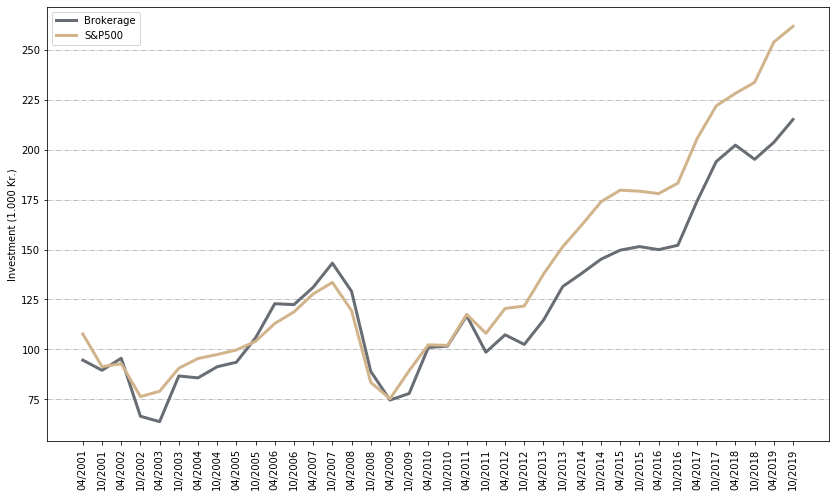

In [606]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

investment_WML['Date'] = investment_WML.index

investment_WML['Date'] = pd.to_datetime(investment_WML.Date)

investment_WML['Date'] = investment_WML['Date'].dt.strftime('%m/%Y')

plt.plot(investment_WML['Date'] , kurtage['inv'] / 1000 , label = 'Brokerage' , color = '#676d73' , linewidth = 3)
plt.plot(investment_WML['Date'] , sp500['inv'] /1000 , label = 'S&P500' , color = '#D2B48C' , linewidth = 3)

plt.legend(loc = 'upper left')

plt.ylabel('Investment (1.000 Kr.)')
plt.xticks(rotation = 90)
plt.grid(True , axis = 'y' , linestyle = '-.')
plt.savefig('Brokerage.png')
plt.show()

## Extension with new percentiles

In [607]:
#Husk at første obs skal inkluderes i investeringen initielt
kurtage2 = pd.read_excel('Brokerage2.xlsx' , index_col = 0)
kurtage2 = kurtage2.iloc[1: , :]
kurtage2 = kurtage2.set_index(investment_W.index)
kurtage2['Return'] = investment_W.iloc[: , 0]
kurtage2['inv'] = 100000
kurtage2.iloc[0 , 2] = 100000 - (3277 / 2) + (kurtage2.iloc[0 , 1] * (100000-(3277 / 2)) - kurtage2.iloc[0 , 0])

for i in range(1, len(kurtage2)):
    kurtage2.iloc[i , 2] = kurtage2.iloc[i-1 , 2] + (kurtage2.iloc[i-1 , 2] * kurtage2.iloc[i , 1]) - kurtage2.iloc[i , 0]

display(kurtage2.iloc[-1] / 100000 * 100)
kurtage2.iloc[: , 1].std()

Brokerage       1.827000
Return          0.000074
inv          1017.804239
Name: 31-10-2019 00:00, dtype: float64

0.132617979246794

In [608]:
table['NewPerc'] = kurtage2['inv'] - sp500['inv']

print(table.tail(38))

WinnerD         LoserD           WMLD    BrokerageD  \
30-04-2001 00:00 -3.691927e+03  -20549.253891  -12120.590200 -13073.662741   
31-10-2001 00:00  1.323247e+04    7398.093965   10852.954665  -1827.356064   
30-04-2002 00:00  2.604320e+04  -14149.202164    5970.957922   2719.619307   
31-10-2002 00:00  1.429311e+04   17078.110179   19979.583136  -9842.764160   
30-04-2003 00:00  1.637865e+04  -21756.925610    1193.106522 -15233.793964   
31-10-2003 00:00  4.721881e+04  -51159.296329   -5041.431405  -3885.685873   
30-04-2004 00:00  4.991278e+04  -61635.721025  -13646.187824  -9713.092402   
29-10-2004 00:00  6.733717e+04  -65592.212774  -12561.582087  -6104.594474   
29-04-2005 00:00  7.934444e+04  -70298.971834  -14388.827124  -6158.102131   
31-10-2005 00:00  1.094248e+05  -77935.095111  -15322.355104   1751.007626   
28-04-2006 00:00  1.466917e+05  -90628.771347  -21053.285580   9914.615592   
31-10-2006 00:00  1.535797e+05  -98005.698400  -27850.546203   3650.344504   
30-04-200

In [609]:
display(stats.ttest_1samp(table['NewPerc'], 0))

Ttest_1sampResult(statistic=6.032871900466469, pvalue=5.667127338450004e-07)

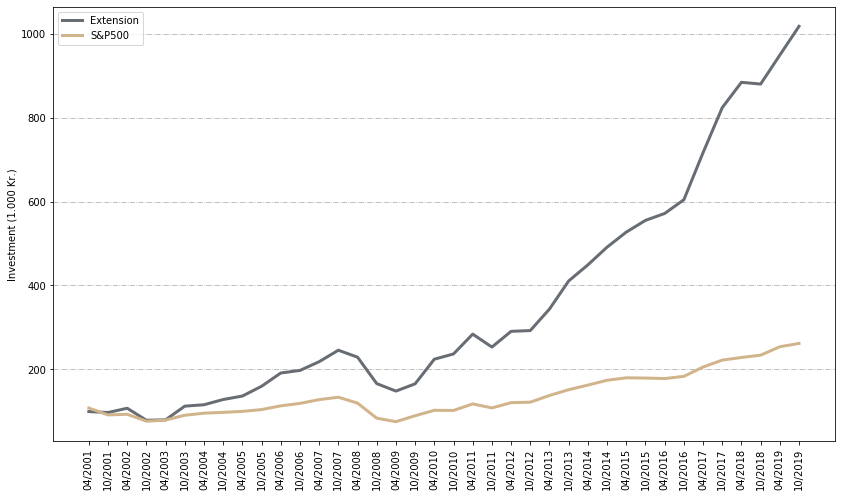

In [610]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

investment_WML['Date'] = investment_WML.index

investment_WML['Date'] = pd.to_datetime(investment_WML.Date)

investment_WML['Date'] = investment_WML['Date'].dt.strftime('%m/%Y')

plt.plot(investment_WML['Date'] , kurtage2['inv'] / 1000 , label = 'Extension' , color = '#676d73' , linewidth = 3)
plt.plot(investment_WML['Date'] , sp500['inv'] /1000 , label = 'S&P500' , color = '#D2B48C' , linewidth = 3)

plt.legend(loc = 'upper left')

plt.ylabel('Investment (1.000 Kr.)')
plt.xticks(rotation = 90)
plt.grid(True , axis = 'y' , linestyle = '-.')
plt.savefig('Brokerage2.png')
plt.show()